**Import Data**

In [2]:
import nltk
import pandas as pd

df = pd.read_csv('/content/pizza_intent_dataset.csv')

# We print and see what the data set is like
# Intent data shape
print('\nIntent data shape: ', df.shape)

print('\nColumn names of intent data set:', df.columns)

# Checking missing value in label and text
print('\nTotal missing values:\n', df.iloc[:, 0:-1].isnull().sum(), "\n")

df.info()

df.head(5)


Intent data shape:  (304, 3)

Column names of intent data set: Index(['label', 'text', 'text_clean'], dtype='object')

Total missing values:
 label    0
text     0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   label       304 non-null    object 
 1   text        304 non-null    object 
 2   text_clean  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 7.2+ KB


,label,text,text_clean
0,complain,I didn't like the taste of the pizza,NaN
1,complain,The pizza had a very bad taste,NaN
2,order,I want a medium pizza and one large.,NaN
3,menu,What is the size of the large pizza?,NaN
4,menu,Do you have a pizza with extra bacon?,NaN


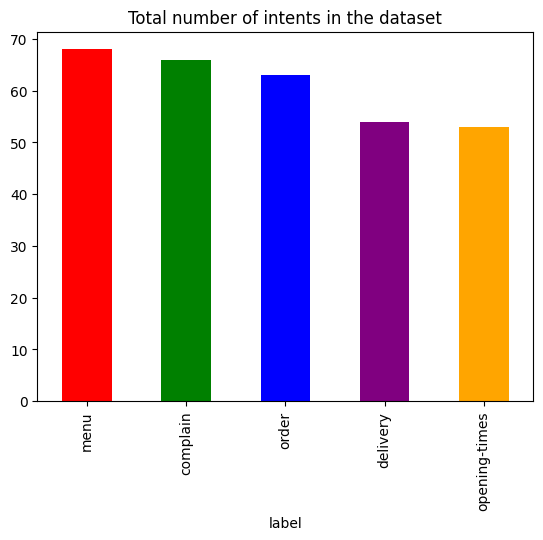

In [3]:
from matplotlib import pyplot as plt

# Graph of data for each label
df['label'].value_counts().plot.bar(color=['red', 'green', 'blue', 'purple', 'orange'])
plt.title('Total number of intents in the dataset')
plt.show()

**Preprocessing**

In [4]:
df['text'] = df['text'].astype(str)
df['text_clean'] = df['text_clean'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       304 non-null    object
 1   text        304 non-null    object
 2   text_clean  304 non-null    object
dtypes: object(3)
memory usage: 7.2+ KB


**Preprocessing: Lower Casing**

In [5]:
df['text_clean'] = df['text'].str.lower()
df.head()

,label,text,text_clean
0,complain,I didn't like the taste of the pizza,i didn't like the taste of the pizza
1,complain,The pizza had a very bad taste,the pizza had a very bad taste
2,order,I want a medium pizza and one large.,i want a medium pizza and one large.
3,menu,What is the size of the large pizza?,what is the size of the large pizza?
4,menu,Do you have a pizza with extra bacon?,do you have a pizza with extra bacon?


**Preprocessing: Expanding contractions**

In [6]:
!pip install contractions
import contractions

df["text_clean"] = df["text_clean"].apply(contractions.fix)
df.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.4 MB/s eta 0:00:00


,label,text,text_clean
0,complain,I didn't like the taste of the pizza,i did not like the taste of the pizza
1,complain,The pizza had a very bad taste,the pizza had a very bad taste
2,order,I want a medium pizza and one large.,i want a medium pizza and one large.
3,menu,What is the size of the large pizza?,what is the size of the large pizza?
4,menu,Do you have a pizza with extra bacon?,do you have a pizza with extra bacon?


**Preprocessing: Removal of stopwords**

In [7]:
from nltk.corpus import stopwords

nltk.download('stopwords', quiet=True)
", ".join(stopwords.words('english'))

stopwords_to_remove = set(stopwords.words('english'))


def remove_stopwords(text: str, _stopwords: set):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in _stopwords])


df["text_clean"] = df["text_clean"].apply(lambda text: remove_stopwords(text, stopwords_to_remove))
df.head()

,label,text,text_clean
0,complain,I didn't like the taste of the pizza,like taste pizza
1,complain,The pizza had a very bad taste,pizza bad taste
2,order,I want a medium pizza and one large.,want medium pizza one large.
3,menu,What is the size of the large pizza?,size large pizza?
4,menu,Do you have a pizza with extra bacon?,pizza extra bacon?


**Preprocessing: Removal of punctuations**

In [8]:
import string

punctuation_to_remove = string.punctuation
print('We\'ll remove', punctuation_to_remove)


def remove_punctuation(text: str, punctuation: str):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', punctuation))


df['text_clean'] = df['text_clean'].apply(lambda text: remove_punctuation(text, punctuation_to_remove))
df.head()

We'll remove !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,label,text,text_clean
0,complain,I didn't like the taste of the pizza,like taste pizza
1,complain,The pizza had a very bad taste,pizza bad taste
2,order,I want a medium pizza and one large.,want medium pizza one large
3,menu,What is the size of the large pizza?,size large pizza
4,menu,Do you have a pizza with extra bacon?,pizza extra bacon


**Preprocessing: Lemmatization**

In [14]:
import nltk

# Download the required NLTK resource
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [15]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('omw-1.4', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger_eng ', quiet=True)

lemmatizer_to_use = WordNetLemmatizer()
words_map = {"N": wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}


def lemmatize_words(text, lemmatizer: WordNetLemmatizer, wordnet_map):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join(
        [lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])


df["text_clean"] = df["text_clean"].apply(lambda text: lemmatize_words(text, lemmatizer_to_use, words_map))
df.head()


[nltk_data] Error loading averaged_perceptron_tagger_eng : Package
[nltk_data]     'averaged_perceptron_tagger_eng ' not found in index


,label,text,text_clean
0,complain,I didn't like the taste of the pizza,like taste pizza
1,complain,The pizza had a very bad taste,pizza bad taste
2,order,I want a medium pizza and one large.,want medium pizza one large
3,menu,What is the size of the large pizza?,size large pizza
4,menu,Do you have a pizza with extra bacon?,pizza extra bacon


**Splitting the data to test and training**

In [16]:
# Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

cv = CountVectorizer()
X = cv.fit_transform(df.text_clean)

# Get the categories
y = df.label

# Split arrays or matrices into 80%-20% train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape, " = x train shape")
print(X_test.shape, " = x test shape")

(243, 310)  = x train shape
(61, 310)  = x test shape


**Model comparison**

In [17]:
from sklearn.metrics import precision_score, accuracy_score
from time import perf_counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    "Random Forest": {"model": RandomForestClassifier(), "perf": 0},
    "Gradient Boosting": {"model": GradientBoostingClassifier(), "perf": 0},
    "MultinomialNB": {"model": MultinomialNB(), "perf": 0},
    "Logistic Regr.": {"model": LogisticRegression(), "perf": 0},
    "KNN": {"model": KNeighborsClassifier(), "perf": 0},
    "Decision Tree": {"model": DecisionTreeClassifier(criterion='gini', random_state=42), "perf": 0},
    "SVM (Linear)": {"model": LinearSVC(), "perf": 0},
    "SVM (RBF)": {"model": SVC(), "perf": 0}
}

for name, model in models.items():
    start = perf_counter()
    model['model'].fit(X_train, y_train)
    duration = perf_counter() - start
    duration = round(duration, 2)
    model["perf"] = duration
    y_pred = model['model'].predict(X_test)
    print(
        f'{name:20} trained in {duration} sec, precision: {round(precision_score(y_test, y_pred, average="micro"), 3) * 100}%,'
        f' accuracy: {round(accuracy_score(y_test, y_pred), 3) * 100}%')


Random Forest        trained in 0.37 sec, precision: 93.4%, accuracy: 93.4%
Gradient Boosting    trained in 1.33 sec, precision: 93.4%, accuracy: 93.4%
MultinomialNB        trained in 0.01 sec, precision: 91.8%, accuracy: 91.8%
Logistic Regr.       trained in 0.02 sec, precision: 95.1%, accuracy: 95.1%
KNN                  trained in 0.0 sec, precision: 88.5%, accuracy: 88.5%
Decision Tree        trained in 0.01 sec, precision: 86.9%, accuracy: 86.9%
SVM (Linear)         trained in 0.01 sec, precision: 95.1%, accuracy: 95.1%
SVM (RBF)            trained in 0.01 sec, precision: 93.4%, accuracy: 93.4%


**Model Linear SVC**

In [18]:
from sklearn.model_selection import cross_val_score
from time import perf_counter
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score

model = LinearSVC()

start = perf_counter()
model.fit(X_train, y_train)
duration = round(perf_counter() - start, 3)

# Input from test set
y_pred = model.predict(X_test)

print(
    f'## Precision average micro: {round(precision_score(y_test, y_pred, average="micro"), 3) * 100}%,\n'
    f'## Precision average macro: {round(precision_score(y_test, y_pred, average="macro"), 3) * 100}%,\n'
    f'## Accuracy: accuracy: {round(accuracy_score(y_test, y_pred), 3) * 100}, ({duration} secs)\n')

print("Cross validation (precision)")
print(cross_val_score(model, X, y, cv=5, scoring="precision_micro"))


## Precision average micro: 95.1%,
## Precision average macro: 94.5%,
## Accuracy: accuracy: 95.1, (0.006 secs)

Cross validation (precision)
[0.93442623 0.80327869 0.95081967 0.91803279 0.88333333]


**Chatbot**

In [19]:
import pickle
import numpy as np

# Predefined chatbot responses
chatbot_responses = {
    'opening-times':
        '''
        We are open from Monday until Friday from 12:00 pm until 07:00 pm 🕖
        You can enter our website 🌐 www.pizzapap_events.com for further information on holiday hours.
        ''',

    'order':
        '''
        To make an order please call us at 📞 03-555555
        or you can make an online order by visiting:
        🌐 www.pizzapap_order.com
        Ensure all the given information on your order is correct
        (pizza, address, phone number, valid payment).
        Thank you for choosing Pizza Papa!
        ''',

    'complain':
        '''
        We are very sorry to hear that you are not satisfied with Pizza Papa.
        We will review your complaint and get back to you promptly.
        ''',

    'delivery':
        '''
        For delivery details, please enter your ordering number into this link:
        🌐 www.pizzapapa_delivery.com
        You will find a map showing where your delivery is and how long it will take to arrive.
        Further information such as the delivery person's name and contact number is also provided.

        For additional assistance, please call the number listed on the map.
        ''',

    'menu':
        '''
        Our menu is available at 🌐 www.pizzapapas_menu.com
        You will find details such as pizza names, toppings, ingredients, sizes, and prices.
        Please ensure you are not allergic to any of our ingredients.

        For further questions, feel free to call us at 📞 03-555555.
        '''
}

# Map numeric inputs directly to intents
numeric_input_map = {
    "1": "opening-times",
    "2": "order",
    "3": "complain",
    "4": "delivery",
    "5": "menu"
}

# Load model and metadata
try:
    model = pickle.load(open("chatbot_model.pkl", "rb"))
    cv = pickle.load(open("chatbot_cv.pkl", "rb"))
    classes = pickle.load(open("chatbot_classes.pkl", "rb"))
except Exception as e:
    classes = []  # Fallback to avoid further errors

# Function to fetch chatbot response
def response_by_intent(intent):
    return chatbot_responses.get(intent, "I'm sorry, I didn't understand that. Could you clarify?")

# Interactive chatbot function
def enhanced_chatbot():
    print("Hello 👋🙂\nI'm Pizza Papa ChatBot 🍕\nHow can I assist you today?")
    print("Here are some questions I can help with:")
    print("1. What are your opening times?")
    print("2. How can I make an order?")
    print("3. I have a complaint.")
    print("4. Where is my delivery?")
    print("5. Show me the menu.")
    print("\nYou can also type your question directly!")

    while True:
        # Get user input
        user_input = input("\nYou: ").strip()
        if user_input.lower() in ['exit', 'quit', 'bye']:
            print("\nChatbot: Goodbye! Have a great day! 🍕")
            break

        # Handle numeric menu-driven inputs
        if user_input in numeric_input_map:
            intent = numeric_input_map[user_input]
        else:
            # Preprocess user input (replace with your preprocessing steps)
            user_cleaned_input = user_input.lower()
            try:
                prediction = model.predict(cv.transform([user_cleaned_input]))[0]
                intent_index = np.argmax(prediction)
                intent = classes[intent_index]
                confidence = np.max(prediction)

                # Debugging information (optional)
                print(f"[DEBUG] Cleaned Input: {user_cleaned_input}")
                print(f"[DEBUG] Predicted Intent: {intent} (Confidence: {confidence:.2f})")

                # Fallback if confidence is low
                if confidence < 0.5:
                    intent = "unknown"
            except Exception as e:
                print(f"[DEBUG] Error during intent prediction: {e}")
                intent = "unknown"

        # Get and print the chatbot response
        chatbot_response = response_by_intent(intent)
        print(f"\nChatbot: {chatbot_response}")

# Run the enhanced chatbot
enhanced_chatbot()


Hello 👋🙂
I'm Pizza Papa ChatBot 🍕
How can I assist you today?
Here are some questions I can help with:
1. What are your opening times?
2. How can I make an order?
3. I have a complaint.
4. Where is my delivery?
5. Show me the menu.

You can also type your question directly!

You: 1

Chatbot: 
        We are open from Monday until Friday from 12:00 pm until 07:00 pm 🕖
        You can enter our website 🌐 www.pizzapap_events.com for further information on holiday hours.
        

You: 2

Chatbot: 
        To make an order please call us at 📞 03-555555
        or you can make an online order by visiting:
        🌐 www.pizzapap_order.com
        Ensure all the given information on your order is correct
        (pizza, address, phone number, valid payment).
        Thank you for choosing Pizza Papa!
        

You: 3

Chatbot: 
        We are very sorry to hear that you are not satisfied with Pizza Papa.
        We will review your complaint and get back to you promptly.
        

You: 4

Cha